In [36]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

In [48]:
# case is either 'balanced' or 'constant'
def dj_oracle(case, n):
    # (n + 1)-st qubit is output qubit 
    oracle_qc = QuantumCircuit(n + 1)

    # balanced case
    if case == "balanced":
        # generate random number that tells you which CNOTs must be wrap in X-gates
        b = np.random.randint(1, 2 ** n)
        # format b as a binary string of length 'n', padded with zeros
        b_str = format(b, '0' + str(n) + 'b')

        # each digit in b_str corresponds to qubit
        # if qubit is 1, we apply X gate
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

        # CNOT everywhere with output qubit as target
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        # final X gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    if case == "constant":
        # first decide what the fixed output of the oracle will be (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"

    return oracle_gate

In [24]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n + 1, n)

    # output qubit
    dj_circuit.x(n)
    dj_circuit.h(n)

    # set up the input register
    for qubit in range(n):
        dj_circuit.h(qubit)

    # append oracle to circuit
    dj_circuit.append(oracle, range(n + 1))

    # apply H-gates again and measure
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

00100001


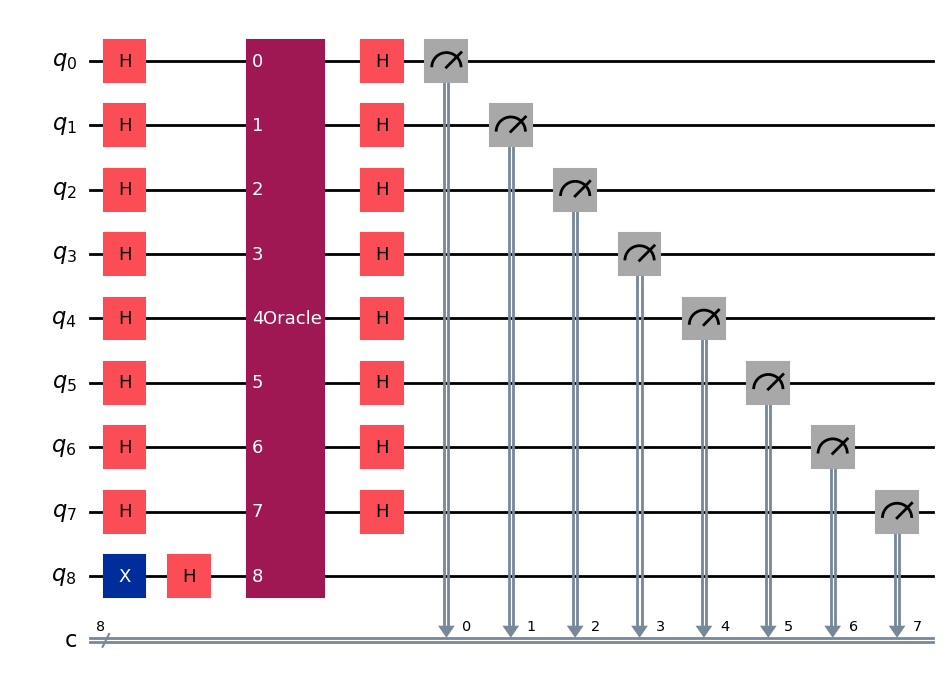

In [47]:
n = 8
oracle_gate_balanced = dj_oracle('balanced', n)
dj_circuit_balanced = dj_algorithm(oracle_gate_balanced, n)
dj_circuit_balanced.draw(output='mpl')

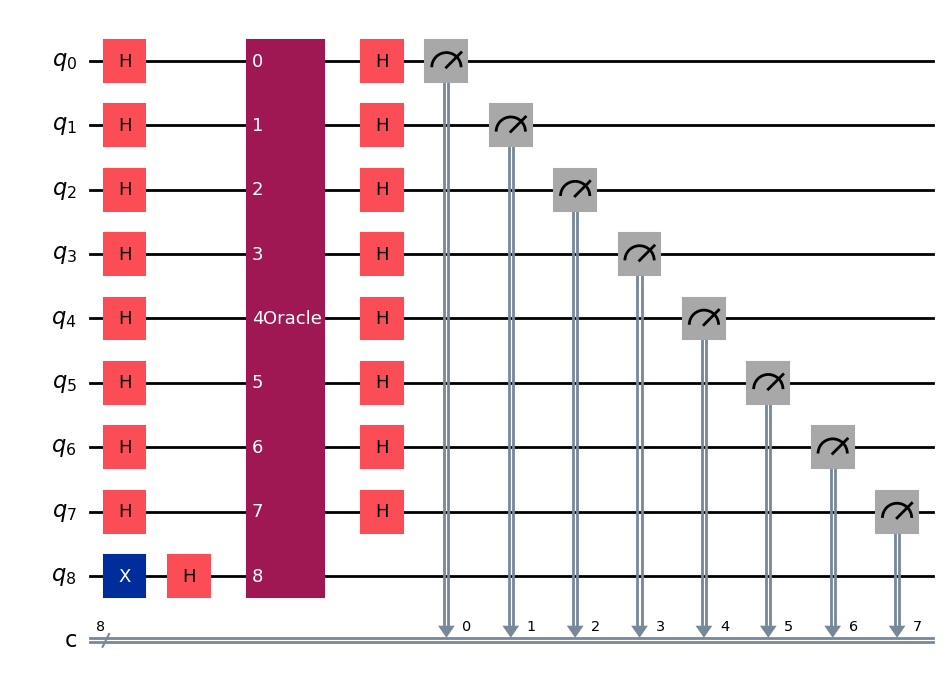

In [43]:
n = 8
oracle_gate_constant = dj_oracle('constant', n)
dj_circuit_constant = dj_algorithm(oracle_gate_constant, n)
dj_circuit_constant.draw(output='mpl')

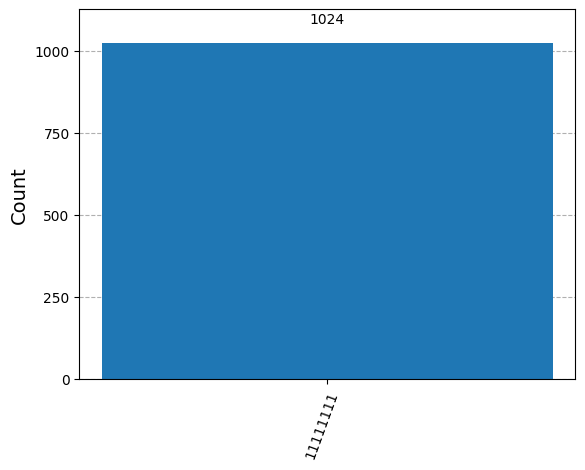

In [44]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit_balanced = transpile(dj_circuit_balanced, aer_sim)
results = aer_sim.run(transpiled_dj_circuit_balanced).result()
answer = results.get_counts()
plot_histogram(answer)

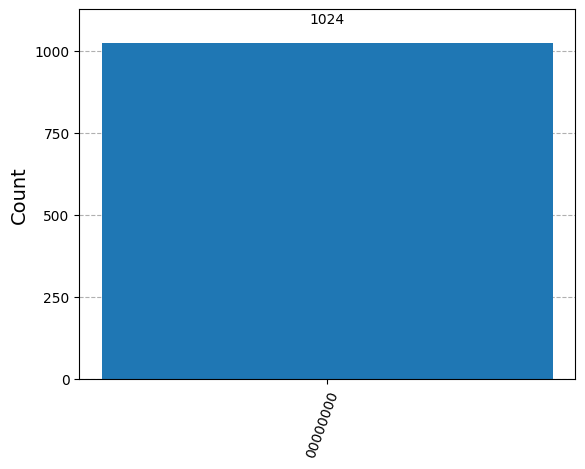

In [45]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit_constant = transpile(dj_circuit_constant, aer_sim)
results = aer_sim.run(transpiled_dj_circuit_constant).result()
answer = results.get_counts()
plot_histogram(answer)